In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Suicide_Detection.csv")
df.head(5)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
lebelencoder = LabelEncoder()
df.iloc[: , -1] = lebelencoder.fit_transform(df.iloc[: , -1])

In [5]:
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,1
1,3,Am I weird I don't get affected by compliments...,0
2,4,Finally 2020 is almost over... So I can never ...,0
3,8,i need helpjust help me im crying so hard,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,0
232070,348106,You how you can tell i have so many friends an...,0
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,348108,The usual stuff you find hereI'm not posting t...,1


In [6]:
df.shape

(232074, 3)

C:\Users\fagr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

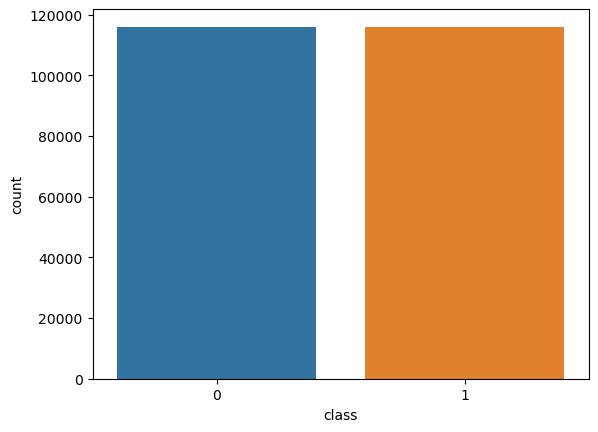

In [7]:
sns.countplot(df['class'])

In [8]:
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    text = re.sub('[^a-zA-Z]',' ',df['text'][i])
    text = text.lower()
    text = text.split()
    text = [wo.lemmatize(word) for word in text ]
    text = ' '.join(text)
    corpus.append(text)

In [9]:
corpus[2]

'finally is almost over so i can never hear ha been a bad year ever again i swear to fucking god it s so annoying'

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

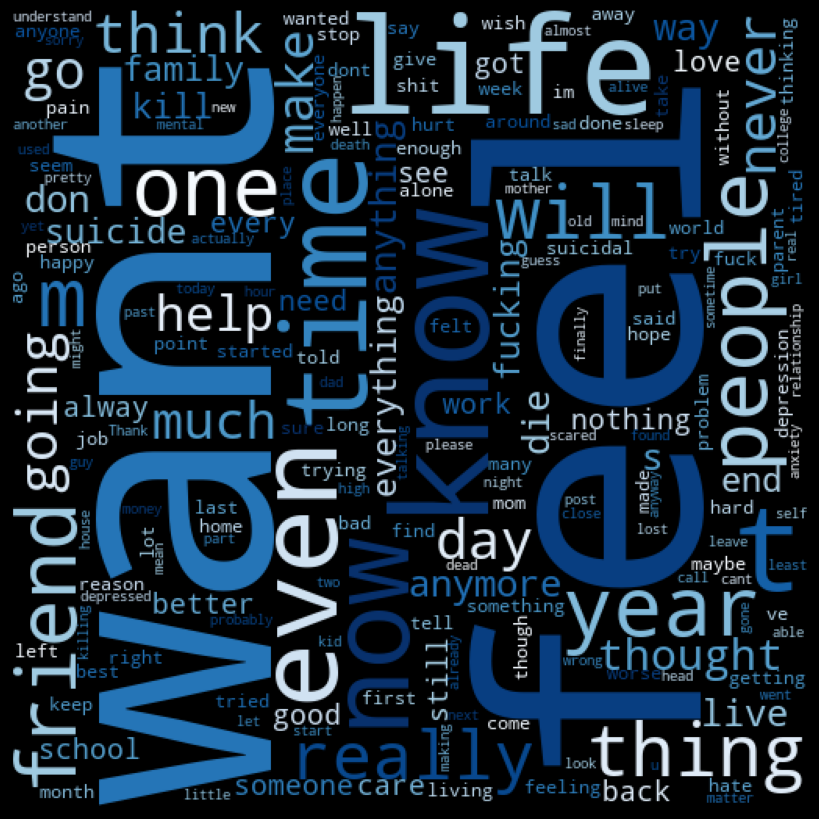

In [11]:
depressive_words = ' '.join(list(df[df['class'] == 1]['text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


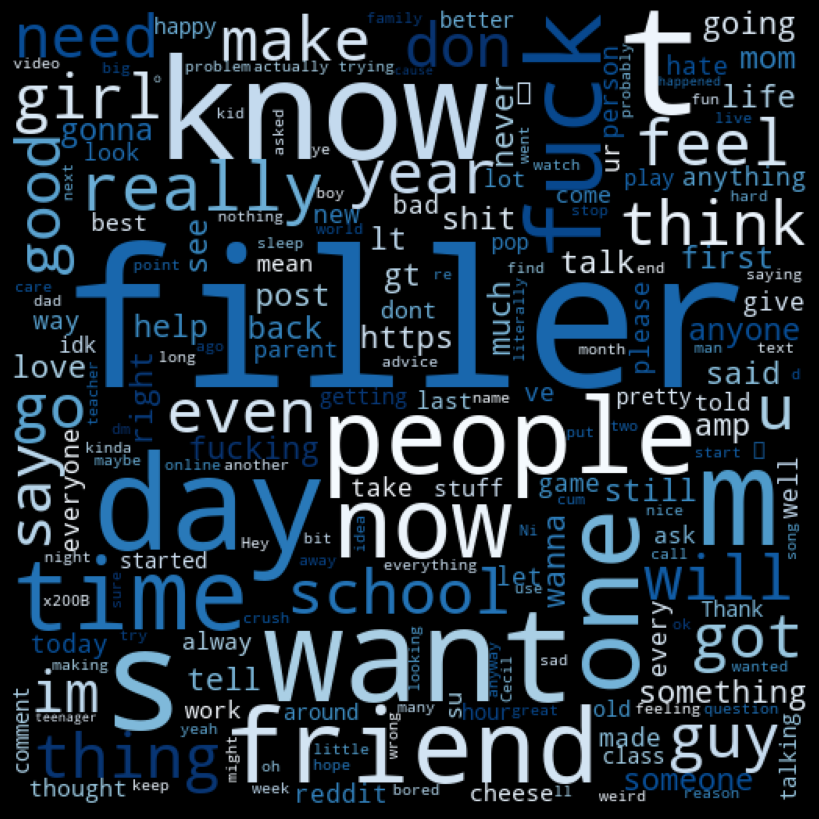

In [12]:
positive_words = ' '.join(list(df[df['class'] == 0]['text']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,df['class'],test_size=0.25,random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)

In [15]:
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [28]:
X_train_vect.shape

(174055, 15000)

In [30]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(174184, 15000)
(174184,)


# APPLYING LOGISTIC REGRESSION MODEL

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)

LogisticRegression()

# CLASSIFICATION REPORT FOR CHECKING THE ACCURACY

In [32]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     29074
           1       0.94      0.93      0.93     29074

    accuracy                           0.93     58148
   macro avg       0.93      0.93      0.93     58148
weighted avg       0.93      0.93      0.93     58148



# APPLYING NAIVE BAYES MULTINOMIALNB MODEL

In [33]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_resample,y_resample)

MultinomialNB()

# CLASSIFICATION REPORT FOR CHECKING THE ACCURACY OF NAIVE BAYES MODEL

In [34]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = mnb.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     29074
           1       0.88      0.94      0.91     29074

    accuracy                           0.91     58148
   macro avg       0.91      0.91      0.91     58148
weighted avg       0.91      0.91      0.91     58148



# APPLYING RandomForestClassifier MODEL

In [40]:
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier()
Model.fit(x_resample,y_resample)

RandomForestClassifier()

# CLASSIFICATION REPORT FOR CHECKING THE ACCURACY OF RandomForestClassifier MODEL

In [41]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = Model.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     29074
           1       0.89      0.91      0.90     29074

    accuracy                           0.90     58148
   macro avg       0.90      0.90      0.90     58148
weighted avg       0.90      0.90      0.90     58148



# FOR TAKING USER INPUT AND PREDICTION

In [35]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [wo.lemmatize(word) for word in a ]
    a = ' '.join(a)  
    return a

In [36]:
import re
strr = input('Enter Your Message: ')
print("-------------------------------")
examples = strr

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =mnb.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('Depressive')

Enter Your Message: happy birthday
-------------------------------
Positive


In [37]:
import pickle
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [ ]:
filename = 'prediction.pkl'
pickle.dump(mnb, open(filename, 'wb'))